In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Cargar Datos

In [2]:
# Subir el archivo
flight_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1IYUWY3soT08zkge-RHNYHqlgv1B48tkFPAJDC0pi0cs/export?format=csv')

# Mostrar que el archivo cargado es el adecuado y lo hizo correctamente
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


Exploración y Análisis Preliminar

In [3]:
flight_data.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [4]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [5]:
flight_data["Source"].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

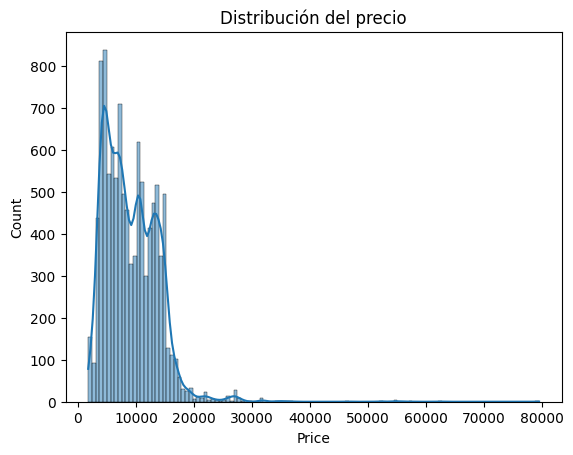

In [6]:
# Ver como se distribuye la columna Precio
sns.histplot(flight_data['Price'].dropna(), kde=True)
plt.title('Distribución del precio')
plt.show()

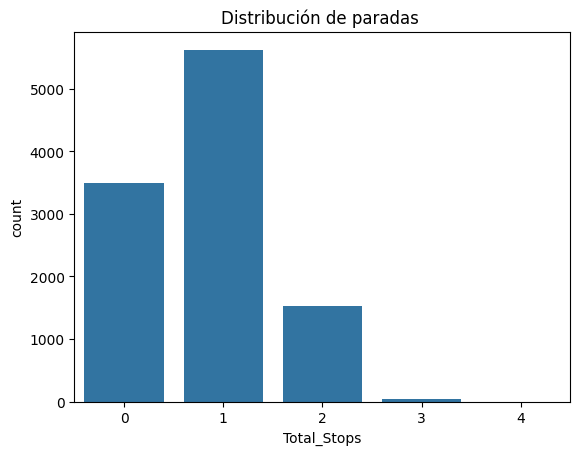

In [7]:
# Ver la distribucion de paradas que hace un vuelo conrrespecto al precio
sns.countplot(x='Total_Stops', data=flight_data)
plt.title('Distribución de paradas ')
plt.show()

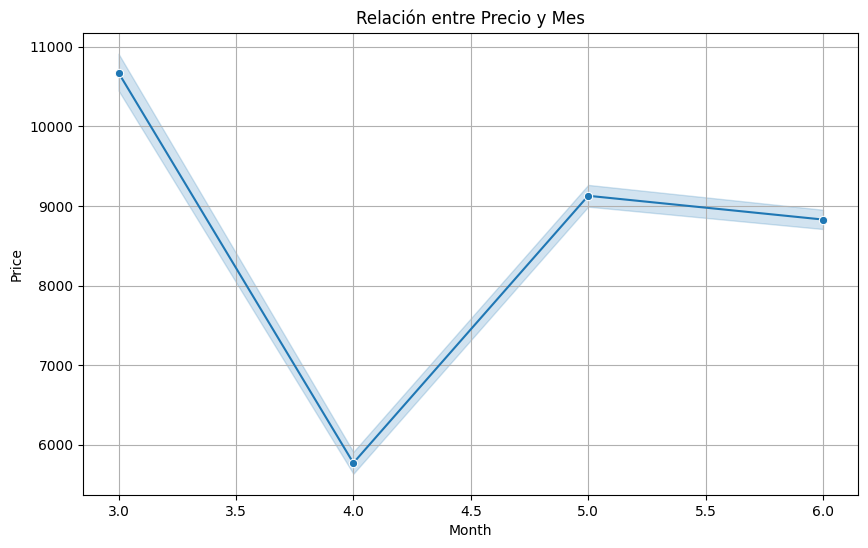

In [8]:
# Ver la relación que puede haber entre el mes del año y el precio del ticket aéreo
plt.figure(figsize=(10, 6))
sns.lineplot(x= 'Month', y= 'Price', data= flight_data, marker='o')
plt.title('Relación entre Precio y Mes')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.show()

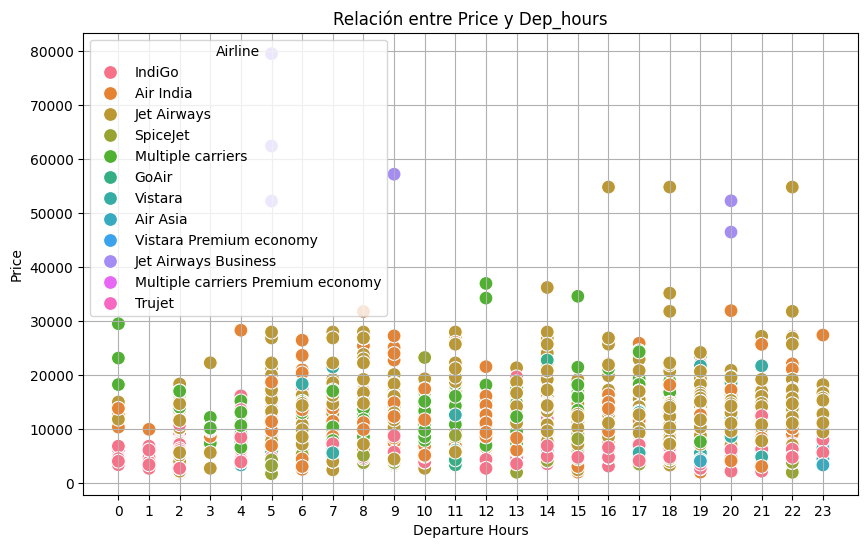

In [9]:
#Ver como varían los precios de los vuelos dependiendo de su hora de partida
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dep_hours', y='Price', data= flight_data, hue='Airline', s=100)
plt.title('Relación entre Price y Dep_hours')
plt.xlabel('Departure Hours')
plt.ylabel('Price')
# Horas de 0 a 23 con intervalos de 1
plt.xticks(range(0, 24, 1))  

plt.grid(True)
plt.show()

Limpieza y Transformación

In [10]:
flight_data.dropna(inplace=True)

In [11]:
flight_data.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

Todos los datos del data set están completos, por lo cual no se debe sustituir ningun valor dentro del mismo

In [25]:
# Guardar los datos transformados y procesados
flight_data.to_csv('flight_data_processed.csv', index=False)

Modelado de Regresión

In [12]:
# Selección del target

X = flight_data.drop(columns=['Price'])
y = flight_data['Price']

In [13]:
# Columnas categóricas para codificar
categorical_cols = ['Airline', 'Source', 'Destination', 'Total_Stops']

# Canalización de preprocesamiento para características categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough')

In [14]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Modelo de regresión lineal
# Crear una canalización que incluya preprocesamiento y el modelo de regresión lineal
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', LinearRegression())])

Prueba 1

In [15]:
# Entrenando el modelo
linear_pipeline.fit(X_train, y_train)

# Predecir los precios en el equipo de prueba.
y_pred_linear = linear_pipeline.predict(X_test)

# Evaluación
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R2: {r2_linear}")

Linear Regression MSE: 7649151.169941376
Linear Regression R2: 0.6212996811351306


Prueba 2: Modelo Mejorado

In [17]:
# 2. Modelo de regresión de bosque aleatorio
# Crear una canalización que incluya preprocesamiento y el modelo de regresión Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42))])

In [18]:
# Entrenamiento
rf_pipeline.fit(X_train, y_train)

# Predecir los precios en el equipo de prueba.
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluación
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression MSE: {mse_rf}")
print(f"Random Forest Regression R2: {r2_rf}")

Random Forest Regression MSE: 4096802.5940275732
Random Forest Regression R2: 0.797172207187983


Modelo extra: XGBOOST

In [19]:
pip install xgboost

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Python\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Python\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "c:\Python\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "c:\Python\lib\http\client.py", line 459, in read
    n = self.readinto(b)
  File "c:\Python\lib\http\client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "c:\Python\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "c:\Python\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "c:\Python\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The read operation timed out

During handling of the above exception, another exception occurred:

Tracebac